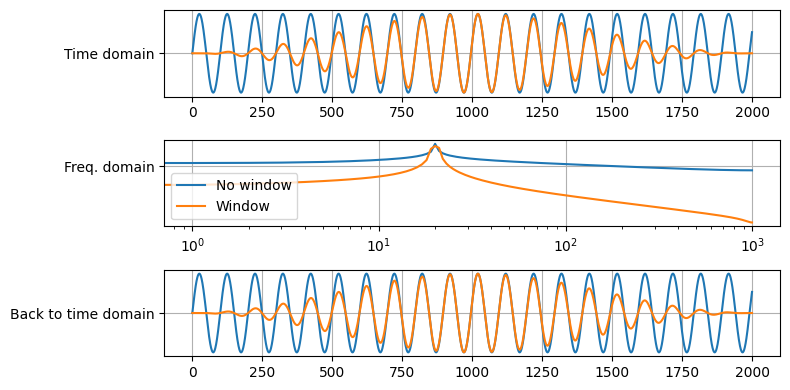

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('default')  # <-- for Jupyter: white figures background

f = 20.1
Ttot = 1
fs = 2e3
t = np.arange(int(Ttot*fs)) / fs

x = np.sin(2 * np.pi * f * t)

# Going to frequency domain
n = len(x)   # FFT size
x_fft = np.fft.fft(x, n)
w = np.hanning(len(x))  # window
# w = np.ones(len(x))  # window
x_win = x * w
x_fft_win = np.fft.fft(x_win, n)
f_vec = np.fft.fftfreq(n) * fs
f_vec = f_vec[:int(n/2)]

# Back to time domain
x_bttd = np.fft.ifft(x_fft, n)
x_bttd = np.real_if_close(x_bttd)
x_bttd_win = np.fft.ifft(x_fft_win, n)
x_bttd_win = np.real_if_close(x_bttd_win)

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(311)
ax.plot(x)
ax.plot(x_win)
ax.grid()
ax.set_yticks([0], labels=['Time domain'])
ax = fig.add_subplot(312)
ax.semilogx(f_vec, np.log10(np.abs(x_fft[:int(n/2)])), label='No window')
ax.plot(f_vec, np.log10(np.abs(x_fft_win[:int(n/2)])), label='Window')
ax.grid()
ax.set_yticks([0], labels=['Freq. domain'])
plt.legend()
ax = fig.add_subplot(313)
ax.plot(x_bttd)
ax.plot(x_bttd_win)
ax.grid()
ax.set_yticks([0], labels=['Back to time domain'])
plt.tight_layout()	
plt.show()

In [50]:
n

2000